# Poisson Regression

Poisson regression is a type of regression when the response (or dependent) variable takes on a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution). A Poisson distribution is commonly used to model the probability of the count of an event within a fixed amount of time. For example, a Poisson distribution may be used to model the following.

- The number of accidents during rush hour in the morning (from 6 to 9 AM).
- The number of calls to a call center during business hours (from 9 AM to 5 PM).

The values of a Poisson distribution are counts of an event (within a fixed amount of time), and these counts are non-negative. The values in a Poisson distribution appear to be continuous since they are numbers, however, the Poisson distribution is **not** a probability density function `PDF`, but, rather, a probability mass function `PMF`. The Poisson PMF is defined as follows,

$\!f(k; \lambda)= \Pr(X{=}k)= \frac{\lambda^k e^{-\lambda}}{k!}$,

where

- $k$ is the number of times the event can occur (within a fixed amount of time), and
- $\lambda$ is the `rate` and $\lambda > 0$.

The Poisson distribution has a strong assumption that the mean is equal to the variance; $\mu = \sigma^2 = \lambda$. When the mean and variance are not equal, an alternative distribution to use is the [negative binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution).

Poisson regression assumes that the logarithm of the expected value of the response variable can be modeled by a linear combination of covariates.

$\log (\operatorname{E}(Y\mid\mathbf{x}))=\alpha + \mathbf{\beta}' \mathbf{x}$

Exponentiating, we can rewrite the model as follows.

$\operatorname{E}(Y\mid\mathbf{x})=e^{\boldsymbol{\theta}' \mathbf{x}}$

## Generate data

We can generate data for Poisson regression as follows.

- $X_1 \sim \mathcal{N}(1, 1)$
- $X_2 \sim \mathcal{N}(2, 1)$
- $e \sim \mathcal{N}(0, 1)$
- $Y \sim \exp(1 + 1 X_1 + 0.1 X_2 + e)$

In [1]:
import numpy as np
import pandas as pd

np.random.seed(37)

N = 10_000
x1 = np.random.normal(1, 1, N)
x2 = np.random.normal(2, 1, N)
y = np.round(np.exp(1 + 0.5 * x1 + 0.1 * x2 + np.random.normal(0, 1, N))).astype(int)

df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
df.head()

,x1,x2,y
0,0.945536,2.133882,7
1,1.674308,1.038547,16
2,1.346647,1.896283,12
3,-0.300346,1.854324,1
4,2.518512,0.949312,7


## Visualize y

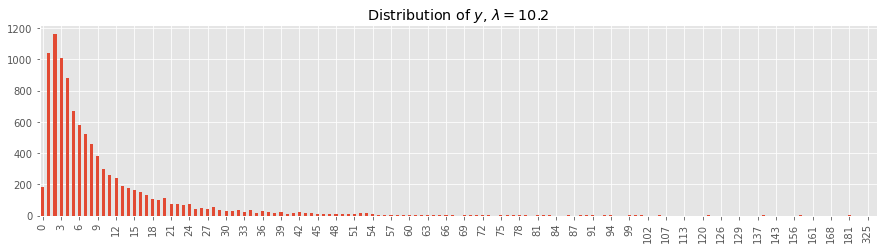

In [2]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

m = df['y'].mean()
s = df['y'].value_counts().sort_index()
ax = s.plot(kind='bar', figsize=(15, 3.5), title=rf'Distribution of $y$, $\lambda={m:.1f}$')
_ = ax.xaxis.set_major_locator(plt.MaxNLocator(50))

## Poisson regression

In [3]:
from sklearn.linear_model import PoissonRegressor

X = df[df.columns.drop('y')]
y = df['y']

model = PoissonRegressor()
model.fit(X, y)

PoissonRegressor()

In [4]:
model.intercept_, model.coef_

(1.5793380835427167, array([0.44838229, 0.09694901]))

In [5]:
model.score(X, y)

0.20214296416305377

## Histogram gradient boosting regression

We can use the experimental `HistGradientBoostingRegressor` algorithm. 

In [6]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=64)
model.fit(X, y)

HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=64)

In [7]:
model.score(X, y)

0.41232578761756855